In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Individual:

  '''
  This class represent an individual in the population for the GA
  
  Attributes:
    - path: a list that is used for storing the direction of the path
    - fitness: a variable used for saving the value of the fitness of the individual
  '''

  def __init__(self):
    '''
    Constructor of the Individual class: path is initialized as an empty list
                                         while fitness is initialized as 0 
    '''
    self.path = []
    self.fitness = 0

  def getPath(self):
    # this method is used to retrieve the path of the individual 
    return self.path

  def getFitness(self):
    # this method is used to retrieve the fitness of the individual
    return self.fitness


In [25]:
class Map:

  '''
  This class is used to create the map where the Orieentiring take place:
  it is a mxn array (m and n are given as parameter) where a certain number of
  obstacles and control points are placed.

  Attributes:
    - lenght: the lenght of the map (the m dimension)
    - height: the height of the map (the n dimension)
    - number_of_obstacles: the number of obstacles that will appear on the map
    - number_of_cp: number of control points that will appear on the map
    - cp_list: a list containing all the coordinates of the control points. 
               Initially contains the start point at (0,0)
  '''

  def __init__(self, lenght, height, number_of_obstacles, number_of_cp):

    '''
    The constructor of the map: lenght and height represent the dimension of the map (array)
    while number_of_obstacles and number_of_cp represent the number of obstacles and the number
    of control points that will be placed on the map, respectively.
    '''

    self.lenght = lenght
    self.height = height
    self.number_of_obstacles = number_of_obstacles
    self.number_of_cp = number_of_cp
    self.cp_list = [[0,0]]

  def create_map(self):

    '''
    This method is used to fill the array: the 'walkable ground' will be the cells that contains 0, the obstacle
    will be the cells containing 1 and the control points will be the cells containg 2, including the start and
    ending points. 
    '''

    map = np.zeros((self.lenght, self.height)) #initially, we create the array with all 0s
    map[0][0] = 2 #at the star we put 2
    map[self.lenght-1][self.height-1] = 2 # the same at the end  

    for i in range(self.number_of_obstacles): # iterate over the number of obstacles 

      #randomically, create the coordinates where to put the obstacle
      x_obstacle = np.random.randint(0,self.lenght)
      y_obstacle = np.random.randint(0,self.height)
      #print('Posizione ostacolo: {0}, {1}'.format(x_ostacolo,y_ostacolo))

      #check if the coordinate corresponds with a control point, the start or the end
      if map[x_obstacle][y_obstacle] == 2 or (x_obstacle == 0 and y_obstacle == 0) or (x_obstacle == self.lenght and y_obstacle == self.height):
        #if true, do not place the obstacle
        continue
      else:
        #else, put the obstacle
        map[x_obstacle][y_obstacle] = 1
      
      #next, place the control point, if any remain to be placed
      if self.number_of_cp != 0:
        
        #randomically, create the coordinates where to put the control point
        x_cp = np.random.randint(0,self.lenght)
        y_cp = np.random.randint(0,self.height)
        
        #check if the control point is over an obstacle
        if map[x_cp][y_cp] == 1:
          #if true, do not put the control point
          continue
        else: 
          map[x_cp][y_cp] = 2 # put the control point
          self.cp_list.append([x_cp,y_cp]) # add the coordinate to the list of all control points
          self.number_of_cp -= 1 # reduce the number of control points

    self.cp_list.append([self.lenght-1,self.height-1]) # in the end, add the arrival point to the list of control points 

    return map, self.cp_list # return the array and the list
    

  def getControlPointList(self):

    # this method is used for obtain the list of control points
    return self.cp_list

  def visualizeMap(self,map):

    '''
    this method is used for plotting the map
    '''
    # set the dimension of the plot
    plt.figure(figsize=(12,12))

    #use a heatmap for plotting, so the same value will have the same color
    sns.heatmap(map, cbar = False, cmap = sns.color_palette("coolwarm", 12))

    # get the x and y coordinate for each point, and sum 0.5, so the line will start at the centre of the square
    x = [self.cp_list[i][1] + 0.5 for i in range(len(self.cp_list))]
    y = [self.cp_list[i][0] + 0.5 for i in range(len(self.cp_list))]

    #plot the lines
    plt.plot(x, y, 'ro-')

    #add text near the point
    plt.text(x[0] - 0.15, y[0] - 0.15, 'Start')
    for i in range(1,len(x)-1):
      plt.text(x[i] + 0.15, y[i] + 0.15, str(i))
    plt.text(x[-1] - 0.20, y[-1] - 0.20, 'End')

    #remove the axis
    plt.axis('off')

    #show the plot
    plt.show()


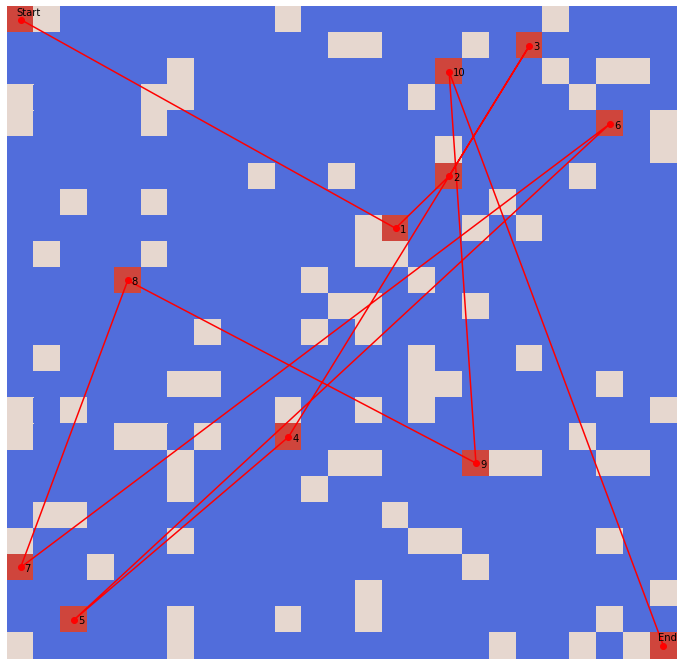

In [26]:
map = Map(25,25,100,10)
mappa, lanterne = map.create_map()
map.visualizeMap(mappa)